In [138]:
import numpy as np
from scipy.integrate import odeint
import numpy.ma as ma
mag = lambda r: np.sqrt(np.sum(r**2))     
# The electric constant 
# k=1/(4*pi*epsilon_naught)
# Right now we will set it to 1
# because until we choose realistic values for qs (which are very low)
# k*q is too large a number and causes roundoff errors in the integrator. 
# k = 8.99*10**9
k=1

def g(y, t, q, m, n,d, k):
    """
    n: the number of particles
    d: the number of dimensions (for fun's sake I want this to work for k-dimensional systems)
    y: an (n*2,d) dimensional matrix where y[:n]_i is the position of the ith particle and
    y[n:]_i is the velocity of the ith particle
    qs: the particle charges
    ms: the particle masses
    k: the electric constant
    t: the current timestamp
    """
    y = y.reshape((4,2))
#     v = y[n:]
    
    r1, r2, dr1dt, dr2dt = np.array(y)
    F = -1./mag(r2-r1)**2

    dy = np.array([
        dr1dt,
        dr2dt,
        F/1.*(r1-r2),
        F/1.*(r2-r1)
    ])

    # rj across, ri down
    rs_from = np.tile(y[:n], (n,1,1))
    
    # ri across, rj down
    rs_to = np.transpose(rs_from, axes=(1,0,2))

    # directional distance between each r_i and r_j
    # dr_ij is the force from j onto i, i.e. r_i - r_j
    dr = rs_to - rs_from
    
    # Used as a mask
    nd_identity = np.eye(n).reshape((n,n,1))
    
    # Force magnitudes
    drmag = ma.array(np.sqrt(np.sum(np.power(dr, 2), 2)), mask=nd_identity)

    # Pairwise q_i*q_j for force equation
    qsa = np.tile(q, (n,1))
    qsb = np.tile(q, (n,1)).T
    qs = qsa*qsb
    
    # Directional forces
    Fs = (1./np.power(drmag,2)).reshape((n,n,1))*dr
    
    # Dividing by m to obtain acceleration vectors
    a = np.sum(Fs, 1)

    # Sliding integrated acceleration to the position derivative slot
    y[:n] = np.array(y[n:])
    
    # Entering the acceleration into the velocity slot
    y[n:] = np.array(a)

    print y==dy
    # Flattening it out for scipy.odeint to work
    return dy.reshape(8)

t_f = 10
t = np.linspace(0, 10, num=t_f)
r1i = np.array([-2., 0.5])
dr1dti = np.array([2.,0.])

r2i = np.array([30.,0.])
dr2dti = np.array([-2., 0.])
y0 = np.array([r1i, r2i, dr1dti, dr2dti]).reshape(8)

# Number of dimensions
d = 2
# Number of point charges
n = 2
# charge magnitudes
q = np.ones(n)
# masses
m = np.ones(n)

# Doing the integration
y = odeint(g, y0, t, args=(q,m,n,d,k)).reshape(t_f,n*n,d)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:59: RuntimeWarning: divide by zero encountered in divide


[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False  True]
 [False  True]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False  True]
 [False  True]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False  True]
 [False  True]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False  True]
 [False  True]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  True]
 [False False]
 [False False]]
[[ True  True]
 [ True  

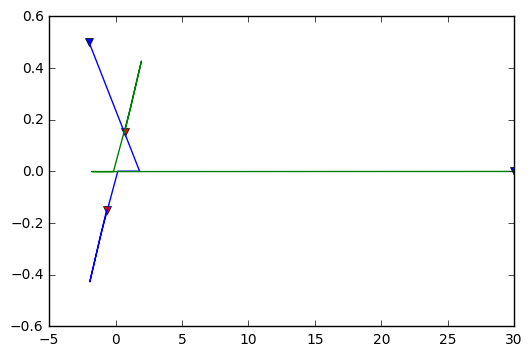

In [139]:
%matplotlib osx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
ys1 = y[:,0,1]
xs1 = y[:,0,0]

xs2 = y[:,1,0]
ys2 = y[:,1,1]


ax.plot(xs1[:1], ys1[:1],'bv')     
ax.plot(xs1[-1:], ys1[-1:], 'rv') 
ax.plot(xs2[:1], ys2[:1], 'bv')    
ax.plot(xs2[-1:], ys2[-1:], 'rv') 
                                          
ax.plot(xs1, ys1)                      
ax.plot(xs2, ys2)                      

plt.show() 


In [161]:
import numpy.ma as ma
Y = np.array([
        [2.,3.],[-4.,-4.], # First n are positions
        [-8.,3.],[-5.,0.2] # Last n are velocities
    ])

y = Y.flatten()
y

array([ 2. ,  3. , -4. , -4. , -8. ,  3. , -5. ,  0.2])

In [139]:
n = 2
d = 2
y = y.reshape((n*2,d))
y == Y

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]], dtype=bool)

In [140]:
v = y[n:]
r = y[:n]
print "Velocities"
print v
print "Positions"
print r

Velocities
[[-8.   3. ]
 [-5.   0.2]]
Positions
[[ 2.  3.]
 [-4. -4.]]


In [141]:
# rj across, ri down
rs_from = np.tile(y[:n], (n,1,1))

# ri across, rj down
rs_to = np.transpose(rs_from, axes=(1,0,2))

dr = rs_to - rs_from
print "From"
print rs_from
print "To"
print rs_to
print "Dr"
print dr

From
[[[ 2.  3.]
  [-4. -4.]]

 [[ 2.  3.]
  [-4. -4.]]]
To
[[[ 2.  3.]
  [ 2.  3.]]

 [[-4. -4.]
  [-4. -4.]]]
Dr
[[[ 0.  0.]
  [ 6.  7.]]

 [[-6. -7.]
  [ 0.  0.]]]


In [142]:
nd_identity = np.eye(n).reshape((n,n,1))

In [143]:
drmag = ma.array(np.sqrt(np.sum(np.power(dr, 2), 2)), mask=nd_identity)
drmag

masked_array(data =
 [[-- 9.219544457292887]
 [9.219544457292887 --]],
             mask =
 [[ True False]
 [False  True]],
       fill_value = 1e+20)

In [144]:
q = np.arange(n)*0+1; q

array([1, 1])

In [145]:
qsa = np.tile(q, (n,1))
qsb = np.tile(q, (n,1)).T
qs = qsa*qsb
qs

array([[1, 1],
       [1, 1]])

In [146]:
Fs = (qs/drmag).reshape((n,n,1))*dr
Fs

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


masked_array(data =
 [[[-- --]
  [0.6507913734559685 0.7592566023652966]]

 [[-0.6507913734559685 -0.7592566023652966]
  [-- --]]],
             mask =
 [[[ True  True]
  [False False]]

 [[False False]
  [ True  True]]],
       fill_value = 1e+20)

In [147]:
Fnet = np.sum(Fs, 1)

In [152]:
a = Fnet/m
np.array(a)

array([[ 0.65079137,  0.7592566 ],
       [-0.65079137, -0.7592566 ]])

In [156]:
Y[:n] = y[n:]
Y[n:] = a

ValueError: could not broadcast input array from shape (8,4,2) into shape (2,2)